In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/bank-full.csv'  # Replace with your file path
raw_data = pd.read_csv(file_path, sep=';')

# Preview the data
print("Dataset Preview:")
print(raw_data.head())

# Dataset Information
print("Dataset Info:")
print(raw_data.info())
output_file_path = 'formatted_bank_data.csv'
raw_data.to_csv(output_file_path, index=False)
print(f"Formatted data saved to {output_file_path}")

Dataset Preview:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data

In [2]:
# Remove unnecessary characters
raw_data = raw_data.replace('"', '', regex=True)

# Check for missing values
missing_values = raw_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with missing values (if any exist)
raw_data = raw_data.dropna()

print("Cleaned Dataset Preview:")
print(raw_data.head())

Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Cleaned Dataset Preview:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may  

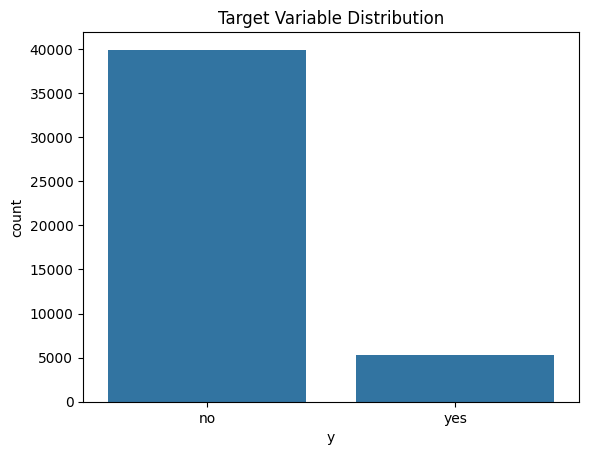

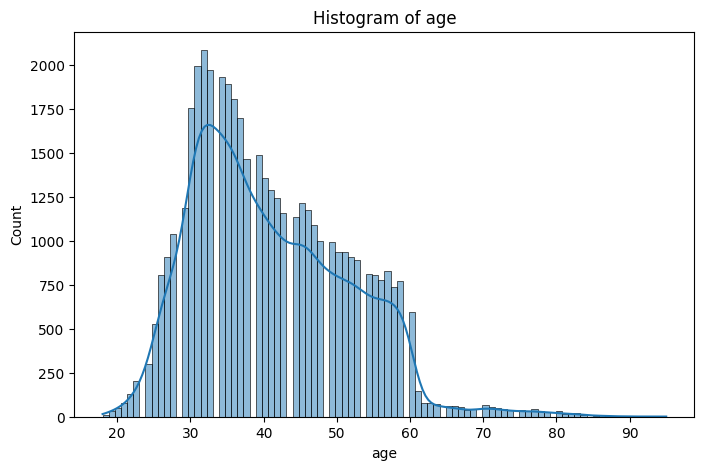

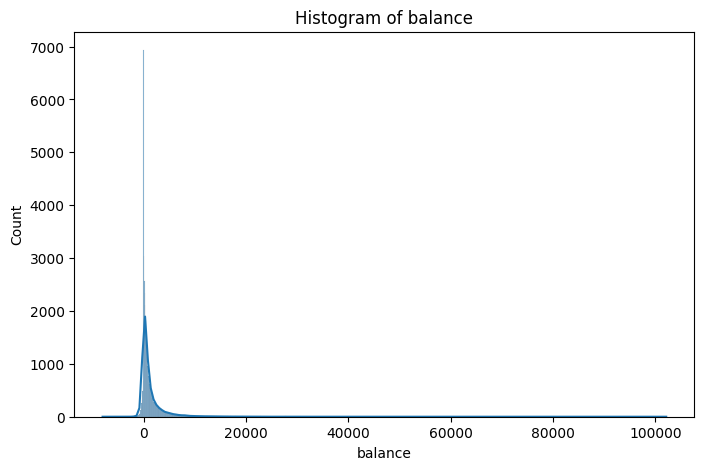

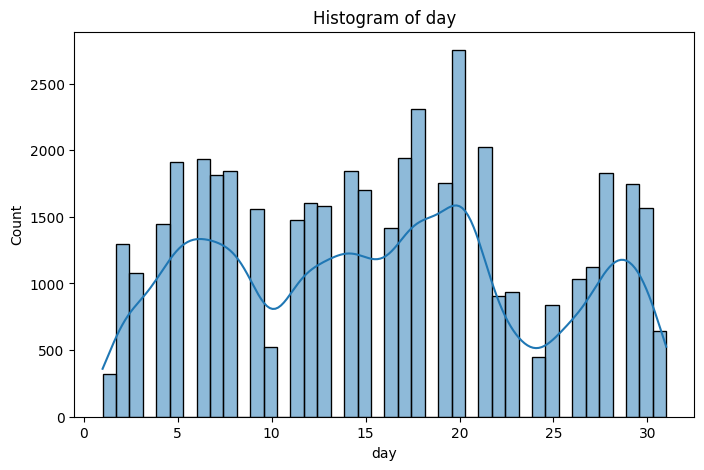

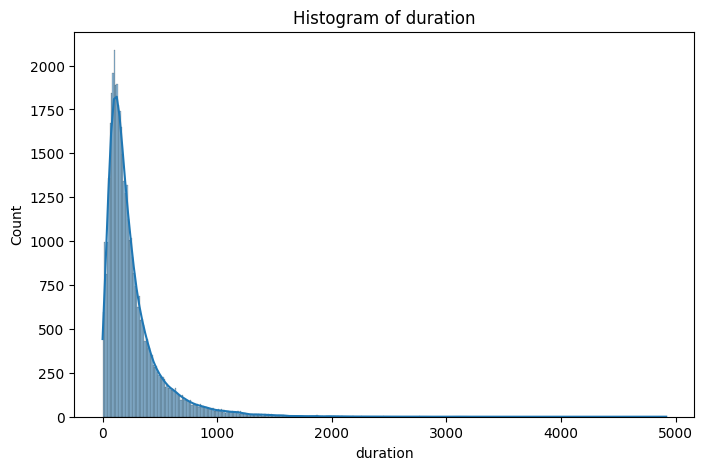

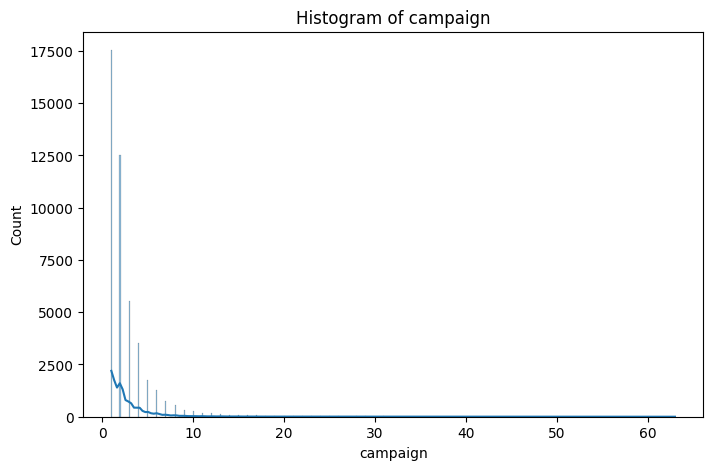

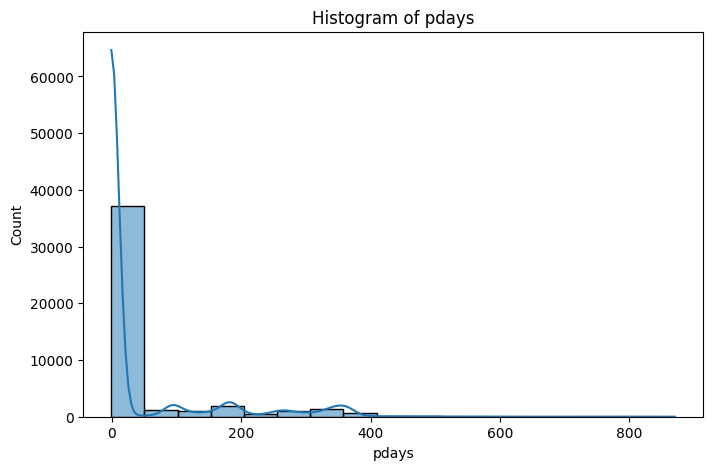

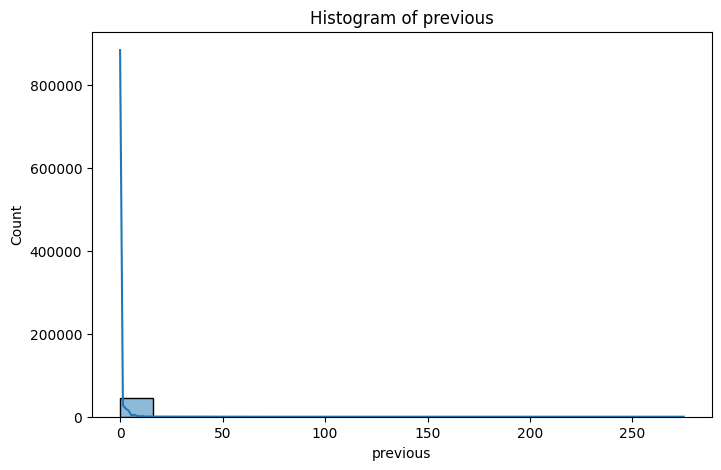

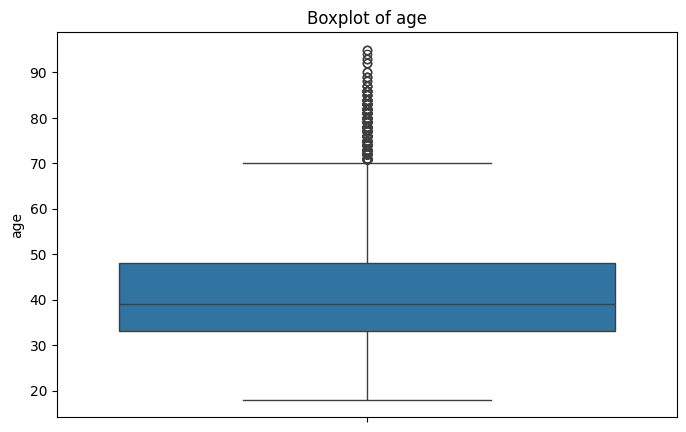

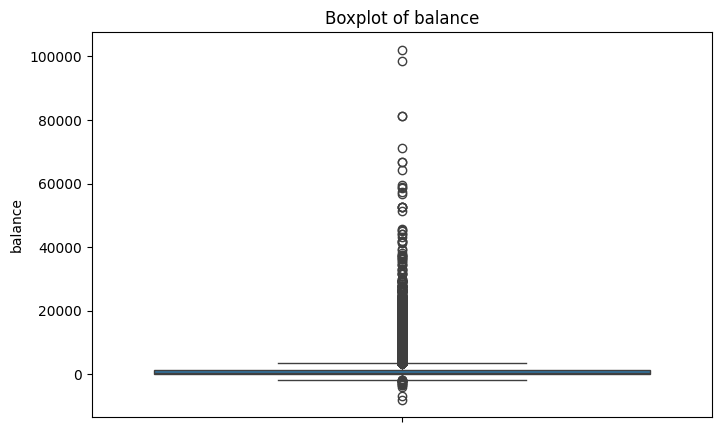

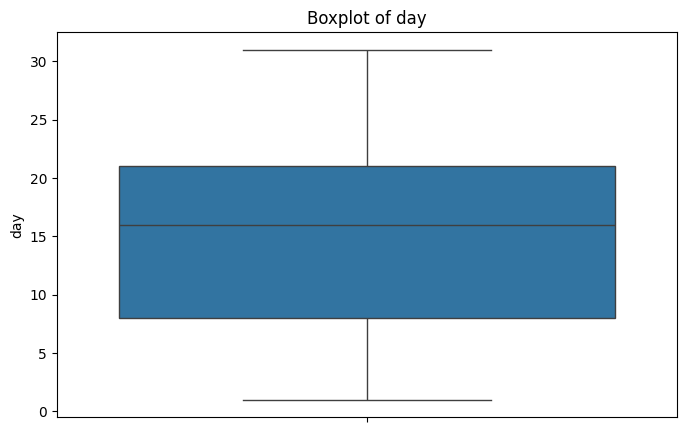

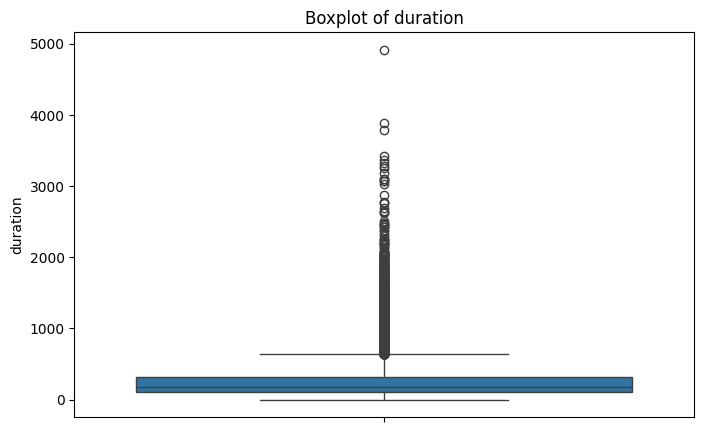

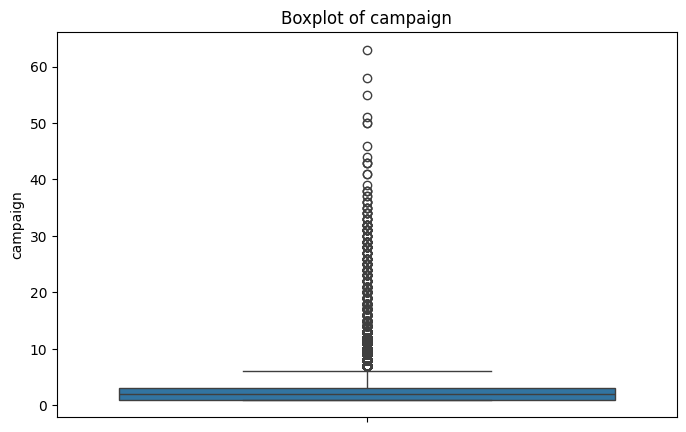

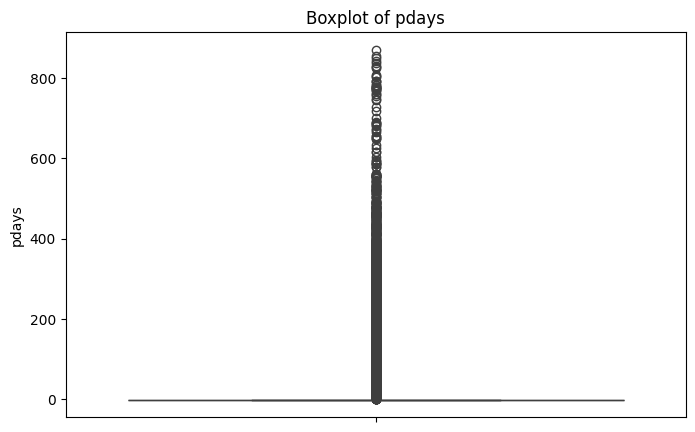

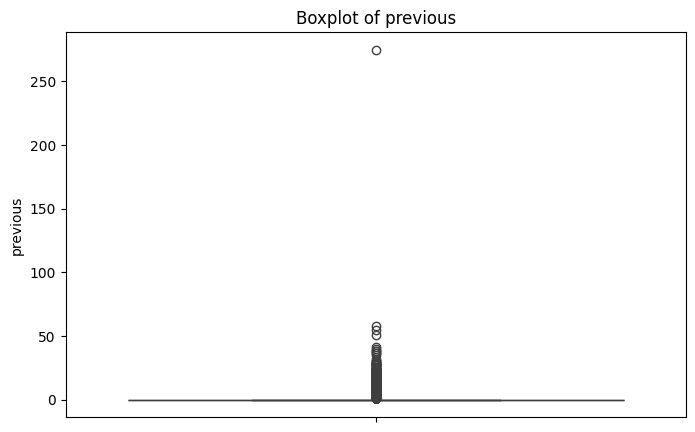

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize Target Variable Distribution
sns.countplot(x='y', data=raw_data)
plt.title('Target Variable Distribution')
plt.show()

# Plot Histograms for Numerical Features
numerical_columns = raw_data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(raw_data[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

# Boxplots for Outlier Detection
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=raw_data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

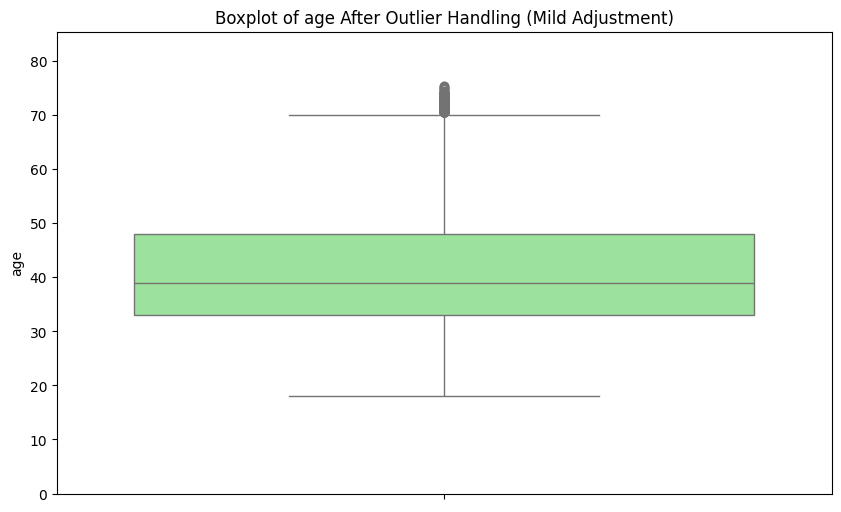

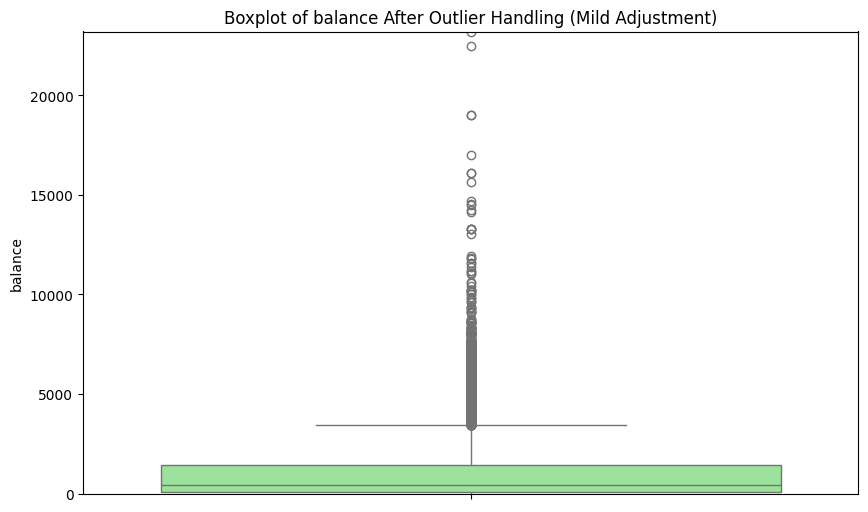

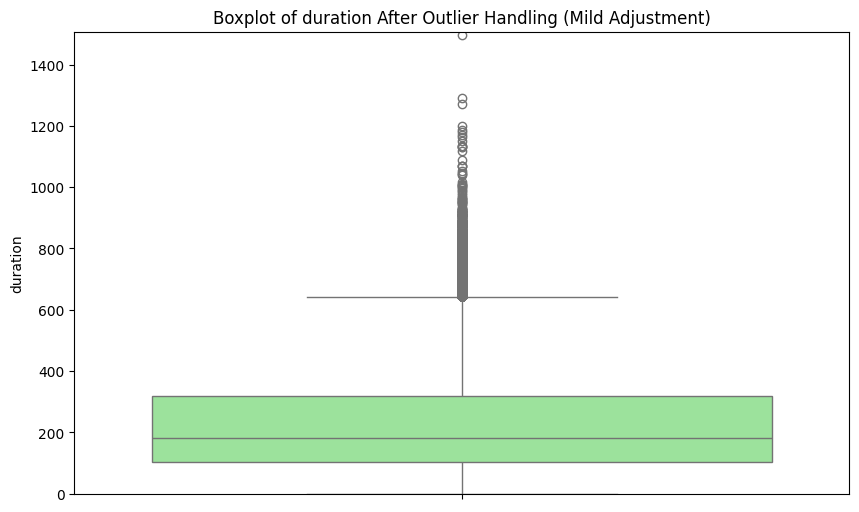

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to adjust outliers
columns_to_adjust = ['age', 'balance', 'duration']  # Add the columns you want to handle

# Function to handle outliers using IQR-based mild adjustment
def handle_outliers_with_dots(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Adjust values slightly closer to the boundary while retaining mild outliers
        df[col] = df[col].apply(
            lambda x: lower_bound + 0.2 * (x - lower_bound) if x < lower_bound
            else (upper_bound - 0.2 * (upper_bound - x) if x > upper_bound else x)
        )
    return df

# Apply the function to handle outliers
raw_data = handle_outliers_with_dots(raw_data, columns_to_adjust)

# Boxplots for adjusted columns with original Y-axis limits
for col in columns_to_adjust:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=raw_data[col], color='lightgreen')
    plt.title(f"Boxplot of {col} After Outlier Handling (Mild Adjustment)")
    plt.ylabel(col)

    # Retain original Y-axis range based on the original data
    original_min = raw_data[col].min()
    original_max = raw_data[col].max()
    plt.ylim(0, original_max + 10)  # Adjust Y-axis to match original data scale
    plt.show()

In [6]:
# Summary of the column before capping
print("Before Capping:")
print(raw_data['age'].describe())

# Summary of the column after capping
print("After Capping:")
print(raw_data['age'].describe())

# Calculate lower_bound and upper_bound again to use them here
Q1 = raw_data['age'].quantile(0.25)
Q3 = raw_data['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Highlight rows where capping would occur
print("Outliers Before Capping:")
print(raw_data[(raw_data['age'] < lower_bound) | (raw_data['age'] > upper_bound)])

Before Capping:
count    45211.000000
mean        40.881790
std         10.434896
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         75.400000
Name: age, dtype: float64
After Capping:
count    45211.000000
mean        40.881790
std         10.434896
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         75.400000
Name: age, dtype: float64
Outliers Before Capping:
        age      job   marital  education default  balance housing loan  \
29158  73.0  retired   married    primary      no    425.0      no   no   
29261  71.4  retired  divorced    primary      no     46.0      no   no   
29263  71.4  retired   married    primary      no   3324.0      no   no   
29322  73.0  retired   married   tertiary      no   4016.8      no   no   
29865  71.4  retired  divorced    primary      no   3545.8     yes   no   
...     ...      ...       ...        ...     ...      ...     ...  ...   
45163  70.6  re

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Identify Categorical and Numerical Features
categorical_columns = raw_data.select_dtypes(include=['object']).columns.difference(['y'])
numerical_columns = raw_data.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
    ]
)

# Prepare Features and Target
X = raw_data.drop('y', axis=1)
y = raw_data['y'].map({'yes': 1, 'no': 0})  # Convert target to binary

In [8]:
from sklearn.model_selection import train_test_split

# Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)



Training Features Shape: (36168, 16)
Testing Features Shape: (9043, 16)


In [9]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply Preprocessing to Training Data
X_train_encoded = preprocessor.fit_transform(X_train)

# SMOTE
print("Class Distribution Before SMOTE:", Counter(y_train))
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded, y_train)
print("Class Distribution After SMOTE:", Counter(y_train_smote))

Class Distribution Before SMOTE: Counter({0: 31937, 1: 4231})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class Distribution After SMOTE: Counter({0: 31937, 1: 31937})


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc
# Make Predictions
# Apply the preprocessor to the testing data before prediction
X_test_encoded = preprocessor.transform(X_test)
rf_predictions = rf_model.predict(X_test_encoded)

# Evaluate Model
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7985
           1       0.59      0.55      0.57      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.75      0.76      9043
weighted avg       0.90      0.90      0.90      9043



In [13]:
from sklearn.neural_network import MLPClassifier

# Train a Neural Network Classifier
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
nn_model.fit(X_train_smote, y_train_smote)

X_test_encoded = preprocessor.transform(X_test)
nn_predictions = nn_model.predict(X_test_encoded)

# Evaluate Model
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_predictions))


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7985
           1       0.51      0.45      0.48      1058

    accuracy                           0.89      9043
   macro avg       0.72      0.69      0.71      9043
weighted avg       0.88      0.89      0.88      9043



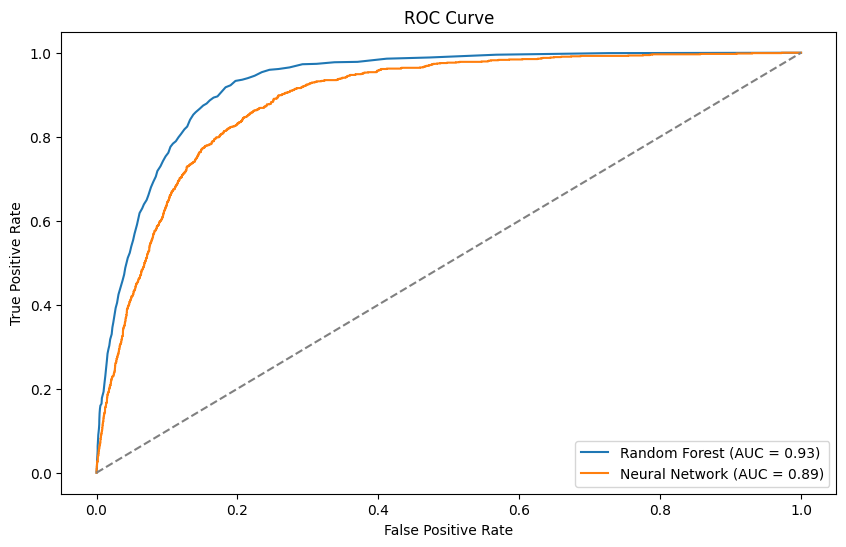

In [16]:
import matplotlib.pyplot as plt

# Get Probabilities for ROC Curve
# Apply the preprocessor to X_test before prediction
X_test_encoded = preprocessor.transform(X_test)

rf_probabilities = rf_model.predict_proba(X_test_encoded)[:, 1]
nn_probabilities = nn_model.predict_proba(X_test_encoded)[:, 1]

# Compute ROC Curve and AUC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probabilities)
rf_auc = auc(rf_fpr, rf_tpr)

nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probabilities)
nn_auc = auc(nn_fpr, nn_tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()